In [1]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:
researcher = pd.read_csv('/Users/yanmemgxing/Desktop/my files/2021/mentor-mentee/Qing Ke/fields/researcher.csv')
mentorship = pd.read_csv('/Users/yanmemgxing/Desktop/my files/2021/mentor-mentee/Qing Ke/fields/mentorship.csv')
files_field = ['chemistry.csv','physics.csv','neuro.csv']

In [3]:
fields_rl = {}
for item in files_field:
    tp = pd.read_csv('./fields/'+item)
    tn = item.split('.')[0]
    fields_rl[tn] = tp

In [4]:
fields_rl['chemistry'].head(2)

,Unnamed: 0,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear
0,3,6,18761,9,1,"University of California, Berkeley",95457486.0,-1,1984
1,117,130,53604,33687,1,Utrecht University,193662353.0,-1,1997


In [5]:
field_GSE = {}
for k in fields_rl:   # key is field's name
    nm = k + '_GSE.pickle'
    neuro0 = fields_rl[k]
    MTO = set(neuro0.MentorID)
    with open(nm,'rb')as f:
        neuro = pickle.load(f)
    neuro = neuro[(neuro.StopYear>=1960)&(neuro.StopYear<=1995)]
    gse = neuro.NumOfMenteesOfTheMentor10
    th1,th2,th3 = np.quantile(gse,0.25),np.quantile(gse,0.5),np.quantile(gse,0.75)
    n_th = math.ceil(len(gse)*0.25)
    mte_small = np.array(neuro.MenteeID[neuro.NumOfMenteesOfTheMentor10<=th1])
    mte_small = mte_small[:n_th]
    mte_median = np.array(neuro.MenteeID[(neuro.NumOfMenteesOfTheMentor10>th1)&
                                         (neuro.NumOfMenteesOfTheMentor10<th3)])
    mte_median = mte_median[:n_th]
    mte_big = np.array(neuro.MenteeID[neuro.NumOfMenteesOfTheMentor10>=th3])
    mte_big = mte_big[:n_th]
    
    sr_small = len([m for m in mte_small if m in MTO])/len(mte_small)
    sr_median = len([m for m in mte_median if m in MTO])/len(mte_median)
    sr_big = len([m for m in mte_big if m in MTO])/len(mte_big)
    
    print([sr_small,sr_median,sr_big])
    print(len(mte_small),len(mte_median),len(mte_big))
    field_GSE[k] = [sr_small,sr_median,sr_big]

[0.7854814170832428, 0.7118017822212562, 0.55553140621604]
4601 4601 4601
[0.8004255319148936, 0.6531914893617021, 0.43148936170212765]
2350 2350 2350
[0.8192044997991161, 0.6742705570291777, 0.5680996384089996]
2489 1885 2489


##### 以发文量计算的 dropout

In [6]:
fields_pub = {}
for item in files_field:
    tp0 = item.split('.')[0]
    tp = pd.read_csv(tp0 + '_0207.csv')
    fields_pub[tp0] = tp

In [7]:
field_GSE_pub = {}
for k in fields_pub:   # key is field's name
    print(k)
    neuro = fields_pub[k]
    neuro = neuro[(neuro.StopYear>=1960)&(neuro.StopYear<=1995)]
    MTO = np.array(neuro.MenteeID[neuro.S_Or_DP==1])
    gse = neuro.NumOfMenteesOfTheMentor10
    n_th = math.ceil(len(gse)*0.25)
    
    #预处理好的数据：分年代计算的退出
#     bigGroup = neuro['MenteeID'][neuro.BigOrSmall==1]
#     smallGroup = neuro['MenteeID'][neuro.BigOrSmall==0]
#     medianGroup = neuro['MenteeID'][neuro.BigOrSmall==-1]
#     mte_small = smallGroup[:n_th]
#     mte_median = medianGroup[:n_th]
#     mte_big = bigGroup[:n_th]
    
    #整体区间计算：1960-1995
    th1,th2,th3 = np.quantile(gse,0.25),np.quantile(gse,0.5),np.quantile(gse,0.75)
    n_th = math.ceil(len(gse)*0.25)
    mte_small = np.array(neuro.MenteeID[neuro.NumOfMenteesOfTheMentor10<=th1])
    mte_small = mte_small[:n_th]
    mte_median = np.array(neuro.MenteeID[(neuro.NumOfMenteesOfTheMentor10>th1)&
                                         (neuro.NumOfMenteesOfTheMentor10<th3)])
    mte_median = mte_median[:n_th]
    mte_big = np.array(neuro.MenteeID[neuro.NumOfMenteesOfTheMentor10>=th3])
    mte_big = mte_big[:n_th]
    
    
   
    
    sr_small = len([m for m in mte_small if m in MTO])/len(mte_small)
    sr_median = len([m for m in mte_median if m in MTO])/len(mte_median)
    sr_big = len([m for m in mte_big if m in MTO])/len(mte_big)
    
    print([sr_small,sr_median,sr_big])
    print(len(mte_small),len(mte_median),len(mte_big))
    field_GSE_pub[k] = [sr_small,sr_median,sr_big]

chemistry
[0.8398174309932623, 0.8128667680938926, 0.6631167137578787]
4601 4601 4601
physics
[0.7787234042553192, 0.7353191489361702, 0.5574468085106383]
2350 2350 2350
neuro
[0.8585777420650864, 0.8047745358090186, 0.7159501807955002]
2489 1885 2489


In [77]:
field_GSE_pub.keys()

dict_keys(['chemistry', 'physics', 'neuro'])

In [8]:
import matplotlib.colors as colors
rgb=([253,192,134],[127,201,127],[190,174,212])
rgb=np.array(rgb)/255
icmap=colors.ListedColormap(rgb,name='my_color')
cmap_color = icmap  #.reversed()

In [54]:
# cmap_color

[0.79, 0.71, 0.56]
[0.8, 0.65, 0.43]
[0.82, 0.67, 0.57]
[0.84, 0.81, 0.66]
[0.78, 0.74, 0.56]
[0.86, 0.8, 0.72]


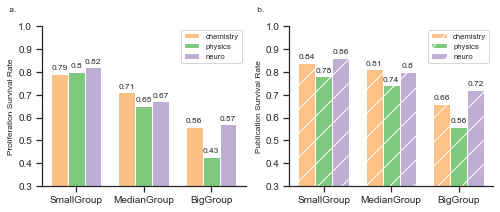

In [13]:
sns.set(style='ticks', font_scale=0.7, font='Arial')
l_index = [' a. ',' b. ',' c. ',' d. ',' e. ',' f. ',' g. ',' h. ',' i. ',' j. ',' k. ',' l. ']
fig = plt.figure(figsize=(7,3),tight_layout=1)#figsize=(10,3.5)
#图1
ax = fig.add_subplot(1,2,1)
i = 0
color_list = []
for k in fields_pub:
    y = field_GSE[k]
    y = [round(ty,2) for ty in y]
    print(y)
    x = np.array([0,2,4])
    bar_width = 0.5
    rects1 = ax.bar(x+bar_width*(i+1), y, bar_width, align="center", color=rgb[i], 
                  label=k, alpha=1)
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset pixels",
                        ha='center', va='bottom')
    autolabel(rects1)
    i+=1
X_ticks = ['SmallGroup','MedianGroup','BigGroup']
c = ax.set_xticks(ticks=[1,3,5],labels=X_ticks)
ax.tick_params(labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
ax.set_ylim([0.3,1])
ax.legend()
ax.set_ylabel('Proliferation Survival Rate')
ax.text(-0.14, 1.1,' a. ',ha='center', va='center', transform=ax.transAxes)
#图2
ax = fig.add_subplot(1,2,2)
i = 0
color_list = []
for k in fields_pub:
    y = field_GSE_pub[k]
    y = [round(ty,2) for ty in y]
    print(y)
    x = np.array([0,2,4])
    bar_width = 0.5
    rects1 = ax.bar(x+bar_width*(i+1), y, bar_width, align="center", color=rgb[i], 
                  label=k, alpha=1,hatch='/')
    autolabel(rects1)
    i+=1
X_ticks = ['SmallGroup','MedianGroup','BigGroup']
c = ax.set_xticks(ticks=[1,3,5],labels=X_ticks)
ax.tick_params(labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
ax.set_ylim([0.3,1])
ax.set_ylabel('Publication Survival Rate')
ax.legend()
ax.text(-0.14, 1.1,' b. ',ha='center', va='center', transform=ax.transAxes)
fig.savefig('dropout comparasion.pdf')